In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling.models import custom_model
import numpy as np

In [2]:
def find_range(x):
    nan_msk = np.isnan(x)
    xx = x[~nan_msk]
    return (np.max(xx)-np.min(xx))

# AnaK-1

In [3]:
#load data
x = np.load('example1_CovMatrix/AnaK1_x_axis_distances.npy')
y = np.load('example1_CovMatrix/AnaK1_y_axis_velocities.npy')
unc = np.load('example1_CovMatrix/AnaK1_y_uncertainities.npy')

Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
          r_cen       alpha  beta       sigma        omega       v_offset     
    ----------------- ----- ----- ------------------ ----- -------------------
    7.990890807087159 1e-05 1e-05 106.66252460508608   1.0 -14.691345894994585


(-200, 200)

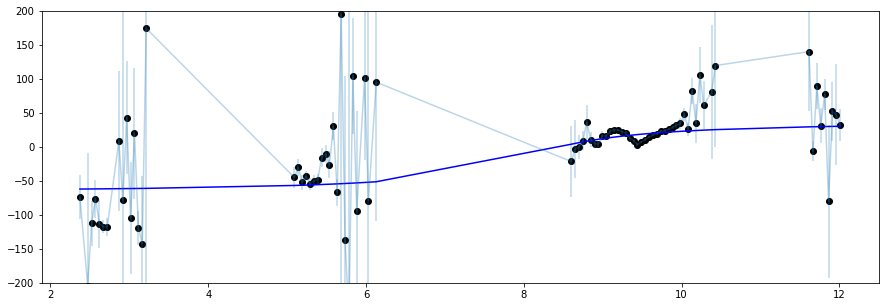

In [4]:
#mass modeling

###define model
@custom_model #very necessary line
def eriksmodel(r, r_cen=0, alpha=.005, beta=.001, sigma=50, omega=1, v_offset=0):
    dr = r - r_cen
    return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi) + v_offset
m_init = eriksmodel(bounds={'r_cen': (4,10), 'alpha':(.01,.00001), 'beta':(.01,.00001),'sigma': (0,170),'omega':(0,1)})
m_init.r_cen=7.1

###fit model
fit = LevMarLSQFitter()
m = fit(m_init, x, y, weights=(1/(unc)**2))
print(m)

###plot fit
plt.figure(figsize=(15,5))
plt.scatter(x, y, color='k')
plt.errorbar(x,y,yerr=unc,alpha=.3)
plt.plot(x, m(x), color='b')
plt.ylim(-200,200) 

In [5]:
#look for 'param_cov': None
print(fit.fit_info['param_cov'])
m

None


<eriksmodel(r_cen=7.99089081, alpha=0.00001, beta=0.00001, sigma=106.66252461, omega=1., v_offset=-14.69134589)>

In [6]:
#maybe if i force xarray to have the best fit r_cen then refit

# new_x = x - m.r_cen.value
new_x = x - 7.990890807087159
new_x

array([-5.61808078, -5.5192137 , -5.46978016, -5.42034661, -5.37091307,
       -5.32147953, -5.27204599, -5.12374536, -5.07431182, -5.02487828,
       -4.97544473, -4.92601119, -4.87657765, -4.82714411, -4.77771057,
       -2.89923596, -2.84980242, -2.80036888, -2.75093534, -2.70150179,
       -2.65206825, -2.60263471, -2.55320117, -2.50376763, -2.45433408,
       -2.40490054, -2.355467  , -2.30603346, -2.25659991, -2.20716637,
       -2.15773283, -2.10829929, -2.0094322 , -1.95999866, -1.86113158,
        0.61054553,  0.65997907,  0.70941262,  0.75884616,  0.8082797 ,
        0.85771324,  0.90714679,  0.95658033,  1.00601387,  1.05544741,
        1.10488095,  1.1543145 ,  1.20374804,  1.25318158,  1.30261512,
        1.35204867,  1.40148221,  1.45091575,  1.50034929,  1.54978283,
        1.59921638,  1.64864992,  1.69808346,  1.747517  ,  1.79695054,
        1.84638409,  1.89581763,  1.94525117,  1.99468471,  2.04411826,
        2.0935518 ,  2.14298534,  2.19241888,  2.24185242,  2.29

Model: eriksmodel2
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
          alpha               beta        ...       omega            v_offset    
    ------------------ ------------------ ... ----------------- -----------------
    28.354093187191765 23.073133821197203 ... 1.625818321676081 2.514562076469079
<eriksmodel2(alpha=28.35409319, beta=23.07313382, sigma=-92.66222877, omega=1.62581832, v_offset=2.51456208)>


(-200, 200)

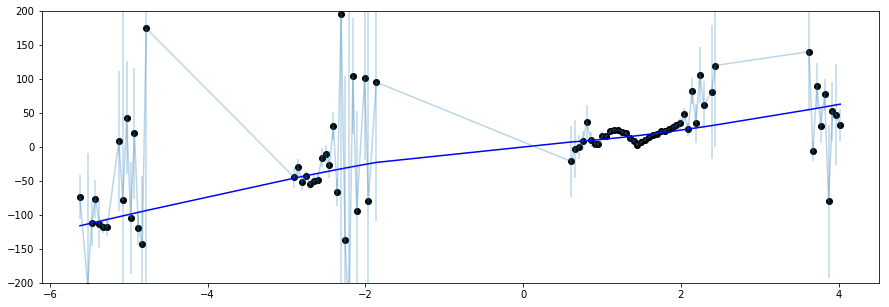

In [7]:
#mass modeling

###define model
@custom_model #very necessary line
# def eriksmodel2(r, alpha=m.alpha.value, beta=m.beta.value, sigma=m.sigma.value, omega=m.omega.value, v_offset=m.v_offset.value):
def eriksmodel2(r, alpha=.005, beta=.001, sigma=50, omega=1, v_offset=0):
#     dr = r - r_cen
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi) + v_offset
# m_init2 = eriksmodel2(bounds={'r_cen': (4,10), 'alpha':(.01,.00001), 'beta':(.01,.00001),'sigma': (0,170),'omega':(0,1)})
m_init2 = eriksmodel2( m.alpha.value, m.beta.value, m.sigma.value, m.omega.value, m.v_offset.value)
# m_init2.r_cen=m.r_cen.value

###fit model
fit2 = LevMarLSQFitter()
m2 = fit(m_init2, new_x, y, weights=(1/(unc)**2))
print(m2)
print(repr(m2))
###plot fit
plt.figure(figsize=(15,5))
plt.scatter(new_x, y, color='k')
plt.errorbar(new_x,y,yerr=unc,alpha=.3)
plt.plot(new_x, m2(new_x), color='b')
plt.ylim(-200,200) 

In [8]:
print(fit2.fit_info['param_cov'])

None


Model: eriksmodel3
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
          alpha               beta        ...       omega            v_offset    
    ------------------ ------------------ ... ----------------- -----------------
    28.354093187191765 23.073133821197203 ... 1.625818321676081 2.514562076469079
<eriksmodel3(alpha=28.35409319, beta=23.07313382, sigma=-92.66222877, omega=1.62581832, v_offset=2.51456208)>


(-200, 200)

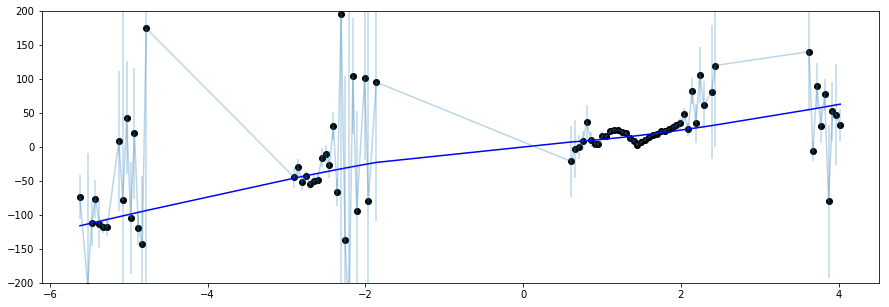

In [9]:
#mass modeling

###define model
@custom_model #very necessary line
def eriksmodel3(r, alpha=m.alpha.value, beta=m.beta.value, sigma=m.sigma.value, omega=m.omega.value, v_offset=m.v_offset.value):
# def eriksmodel2(r, alpha=.005, beta=.001, sigma=50, omega=1, v_offset=0):
#     dr = r - r_cen
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi) + v_offset
m_init3 = eriksmodel3()#  m.alpha.value, m.beta.value, m.sigma.value, m.omega.value, m.v_offset.value)
# m_init2.r_cen=m.r_cen.value

###fit model
fit3 = LevMarLSQFitter()
m3 = fit(m_init3, new_x, y, weights=(1/(unc)**2))
print(m3)
print(repr(m3))
###plot fit
plt.figure(figsize=(15,5))
plt.scatter(new_x, y, color='k')
plt.errorbar(new_x,y,yerr=unc,alpha=.3)
plt.plot(new_x, m3(new_x), color='b')
plt.ylim(-200,200) 

In [10]:
print(fit3.fit_info['param_cov'])

None


Model: eriksmodel4
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
          alpha               beta        ...       omega            v_offset    
    ------------------ ------------------ ... ----------------- -----------------
    28.354093187191765 23.073133821197203 ... 1.625818321676081 2.514562076469079
<eriksmodel4(alpha=28.35409319, beta=23.07313382, sigma=-92.66222877, omega=1.62581832, v_offset=2.51456208)>


(-200, 200)

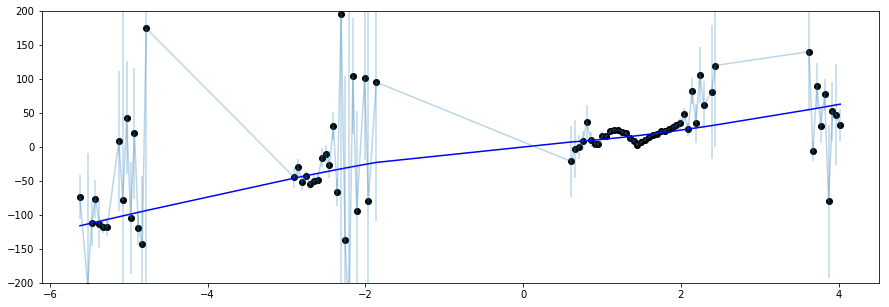

In [11]:
#mass modeling

###define model
@custom_model #very necessary line
def eriksmodel4(r, alpha=m.alpha.value, beta=m.beta.value, sigma=m.sigma.value, omega=m.omega.value, v_offset=m.v_offset.value):
# def eriksmodel2(r, alpha=.005, beta=.001, sigma=50, omega=1, v_offset=0):
#     dr = r - r_cen
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi) + v_offset
m_init4 = eriksmodel4()#  m.alpha.value, m.beta.value, m.sigma.value, m.omega.value, m.v_offset.value)
# m_init2.r_cen=m.r_cen.value
m_init.r_cen = m.r_cen.value
m_init.v_offset = m.v_offset.value
m_init.sigma = m.sigma.value
m_init.alpha = m.alpha.value
m_init.beta = m.beta.value
m_init.omega = m.omega.value

###fit model
fit4 = LevMarLSQFitter()
m4 = fit(m_init4, new_x, y, weights=(1/(unc)**2))
print(m4)
print(repr(m4))
###plot fit
plt.figure(figsize=(15,5))
plt.scatter(new_x, y, color='k')
plt.errorbar(new_x,y,yerr=unc,alpha=.3)
plt.plot(new_x, m4(new_x), color='b')
plt.ylim(-200,200) 

Model: eriksmodel4
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
          alpha               beta        ...       omega             v_offset    
    ------------------ ------------------ ... ------------------ -----------------
    28.332159055873433 23.061280606552437 ... 1.6284651565738257 2.495711774743355
<eriksmodel4(alpha=28.33215906, beta=23.06128061, sigma=-92.57665449, omega=1.62846516, v_offset=2.49571177)>


(-200, 200)

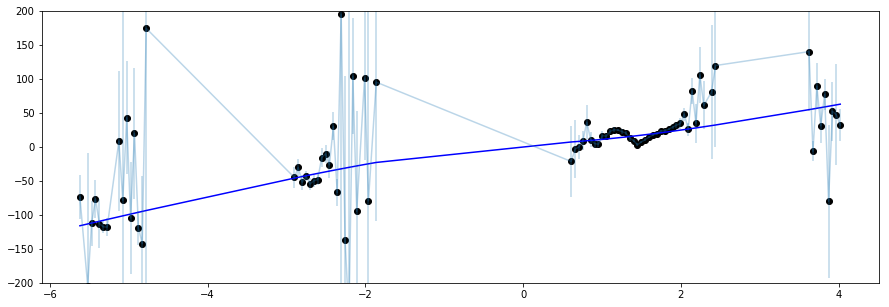

In [12]:
#mass modeling

###define model
@custom_model #very necessary line
def eriksmodel4(r, alpha=0.00001, beta=0.00001, sigma=106.66252461, omega=1., v_offset=-14.69134589):
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi) + v_offset
m_init4 = eriksmodel4()
m_init4.v_offset = -14.69134589
m_init4.sigma = 106.66252461
m_init4.alpha = 0.00001
m_init4.beta = 0.00001
m_init4.omega = 1.

###fit model
fit4 = LevMarLSQFitter()
m4 = fit4(m_init4, new_x, y, weights=(1/(unc)**2))
print(m4)
print(repr(m4))
###plot fit
plt.figure(figsize=(15,5))
plt.scatter(new_x, y, color='k')
plt.errorbar(new_x,y,yerr=unc,alpha=.3)
plt.plot(new_x, m4(new_x), color='b')
plt.ylim(-200,200) 

In [13]:
print(fit4.fit_info['param_cov'])

None


In [14]:
m4(new_x)

array([-116.04281833, -113.38515909, -112.05813431, -110.73235227,
       -109.40784379, -108.0846407 , -106.76277585, -102.80555555,
       -101.48939426, -100.17475244,  -98.86167007,  -97.55018846,
        -96.24035037,  -94.93220001,  -93.62578315,  -45.94911854,
        -44.77308674,  -43.60311947,  -42.43943856,  -41.28227513,
        -40.13186994,  -38.98847377,  -37.85234773,  -36.72376366,
        -35.60300448,  -34.49036449,  -33.3861497 ,  -32.29067818,
        -31.20428025,  -30.12729878,  -29.06008936,  -28.00302041,
        -25.92084223,  -24.89653431,  -22.88357853,    7.24705906,
          7.68205847,    8.12957183,    8.59023245,    9.06456853,
          9.55300789,   10.05588356,   10.57344013,   11.1058405 ,
         11.65317285,   12.2154578 ,   12.79265539,   13.38467197,
         13.99136675,   14.61255803,   15.24802909,   15.89753352,
         16.56080027,   17.23753815,   17.92743991,   18.63018593,
         19.34544747,   20.07288958,   20.81217356,   21.56295

In [15]:
m_init4

<eriksmodel4(alpha=0.00001, beta=0.00001, sigma=106.66252461, omega=1., v_offset=-14.69134589)>

In [16]:
m4

<eriksmodel4(alpha=28.33215906, beta=23.06128061, sigma=-92.57665449, omega=1.62846516, v_offset=2.49571177)>

In [17]:
fit4??

# Gilgamesh-1

In [18]:
#load data
x2 = np.load('example2_CovMatrix/Gilgamesh1_x_axis_distances.npy')
y2 = np.load('example2_CovMatrix/Gilgamesh1_y_axis_velocities.npy')
unc2 = np.load('example2_CovMatrix/Gilgamesh1_y_uncertainities.npy')

Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
    alpha beta       sigma               omega             v_offset    
    ----- ---- ------------------ ------------------- -----------------
    1e-07  1.0 -74.13208221589348 0.13314853521270434 14.88019288212847


/Users/dee/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


(-200, 200)

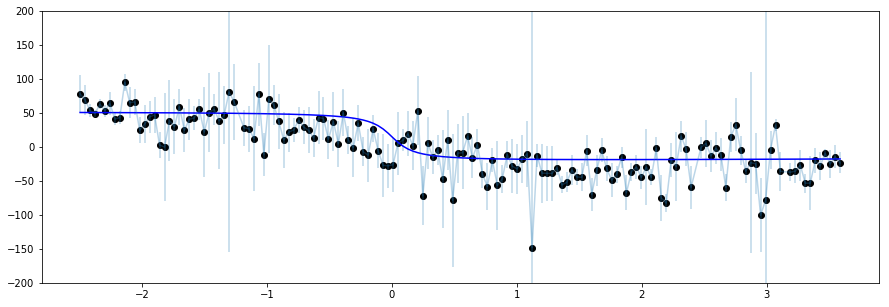

In [19]:
#mass modeling

###define model
@custom_model #very necessary line
def eriksmodel(r, alpha=.00001, beta=.00001, sigma=-120, omega=0.5,v_offset=0):
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)+v_offset
m_init2 = eriksmodel(bounds={'alpha':(.0000001,1), 'beta':(.0000001,1),'sigma': (-300,300),'omega':(0,100)})


###fit model
fit = LevMarLSQFitter()
m2 = fit(m_init2, x2, y2, weights=(1/(unc2)**2))
print(m2)

###plot fit
plt.figure(figsize=(15,5))
plt.scatter(x2, y2, color='k')
plt.errorbar(x2, y2, yerr=unc2, alpha=.3)
plt.plot(x2, m2(x2), color='b')
plt.ylim(-200,200) 

In [20]:
#look for 'param_cov': None
fit.fit_info['param_cov']

# a random custom model example where param_cov works

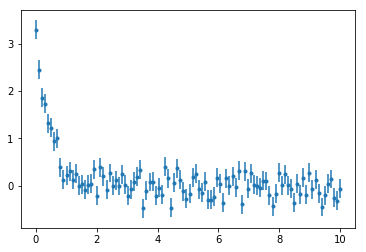

In [21]:
#generate fake data
x1 = np.linspace(0,10,100)
a = 3
b = -2
c = 0
y1 = a*np.exp(b*x1+c)
y1 += np.random.normal(0., 0.2, x1.shape)
y1_err = np.ones(x1.shape)*0.2

#plot fake data
plt.errorbar(x1 , y1, yerr=y1_err, fmt='.')
plt.show()

In [22]:
#def custom  model
@custom_model
def exponential(x, a=1., b=1., c=1.): #like eriksmodel
    return a*np.exp(b*x+c)

#fit model
exp_model = exponential(1.,-1.,1.) #like m_init
fitter = LevMarLSQFitter() #like fit
exp_fit = fitter(exp_model, x1, y1, weights = 1.0/y1_err**2) #like m

In [23]:
fitter.fit_info['param_cov']

array([[ 7.82032297e+12, -5.80489086e+00, -7.64266815e+12],
       [-5.80729488e+00,  3.10758254e-02,  5.66980307e+00],
       [-7.64266815e+12,  5.66745366e+00,  7.46904912e+12]])

In [24]:
#possibly diff data types?

print('Anak1:', type(x),type(y),type(unc))
print('Gilgamesh:',type(x2),type(y2),type(unc2))
print('random ex:',type(x1),type(y1),type(y1_err))
print('##############################')
print('Anak1:', len(x),len(y),len(unc))
print('Gilgamesh:',len(x2),len(y2),len(unc2))
print('random ex:',len(x1),len(y1),len(y1_err))
print('##############################')
print('Anak1:', x.dtype,y.dtype,unc.dtype)
print('Gilgamesh:', x2.dtype,y2.dtype,unc2.dtype)
print('random ex:', x1.dtype,y1.dtype,y1_err.dtype)

Anak1: <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Gilgamesh: <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
random ex: <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
##############################
Anak1: 81 81 81
Gilgamesh: 151 151 151
random ex: 100 100 100
##############################
Anak1: float64 float64 float64
Gilgamesh: float64 float64 float64
random ex: float64 float64 float64


# Difference is the Use of Bounds

<eriksmodel(alpha=8.43334975, beta=25.35253867, sigma=-206.00713854, omega=0.91959901, v_offset=-2.69414487)>
Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
          alpha              beta        ...       omega              v_offset     
    ----------------- ------------------ ... ------------------ -------------------
    8.433349745566364 25.352538673418337 ... 0.9195990139423766 -2.6941448735974918


(-200, 200)

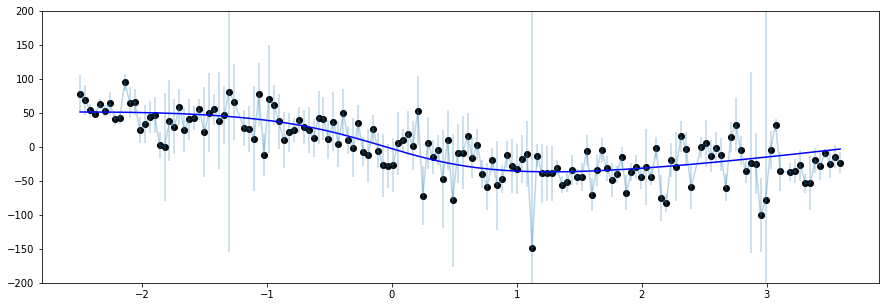

In [25]:
#mass modeling---Gilgamesh1 again

###define model
@custom_model #very necessary line
def eriksmodel(r, alpha=.00001, beta=.00001, sigma=-120, omega=0.5,v_offset=0):
#     dr=r-r_cen #cant include this at all, not =0,not in eqt, even w/o a forced init of rcen, just cant have
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)+v_offset
#####REMOVED BOUNDS HERE
m_init2 = eriksmodel(.0000001,  1.0, -74.13208221589348, 0.13314853521270434, 14.88019288212847)#values from best fit


###fit model
fit = LevMarLSQFitter()
m2 = fit(m_init2, x2, y2, weights=(1/(unc2)**2))
print(repr(m2))
print(m2)
###plot fit
plt.figure(figsize=(15,5))
plt.scatter(x2, y2, color='k')
plt.errorbar(x2, y2, yerr=unc2, alpha=.3)
plt.plot(x2, m2(x2), color='b')
plt.ylim(-200,200) 

In [26]:
fit.fit_info['param_cov'] #... why 5x5? thought was 3x3 well that was gauss but still

array([[ 2.30580379e+02,  1.53482187e+02, -1.73678113e+03,
         7.94637193e+00,  8.38546542e+01],
       [ 1.53482187e+02,  1.32745709e+02, -1.37880497e+03,
         7.12368566e+00,  3.43238521e+01],
       [-1.73678113e+03, -1.37880497e+03,  1.48723288e+04,
        -7.57494476e+01, -4.88554637e+02],
       [ 7.94637193e+00,  7.12368566e+00, -7.57494476e+01,
         4.25243246e-01,  1.83676352e+00],
       [ 8.38546542e+01,  3.43238521e+01, -4.88554637e+02,
         1.83676352e+00,  4.87687941e+01]])

In [27]:
fit.fit_info['param_cov'][2][2]

14872.328823810562

<eriksmodel(alpha=8.41848905, beta=25.33978572, sigma=-205.8701181, omega=0.91884645, v_offset=-2.69793063)>
Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
          alpha              beta       ...       omega             v_offset     
    ----------------- ----------------- ... ------------------ ------------------
    8.418489054767651 25.33978572220137 ... 0.9188464504494288 -2.697930629751297


(-200, 200)

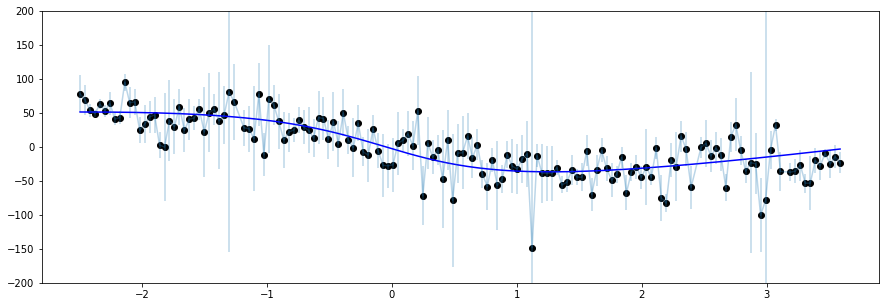

In [28]:
#mass modeling---Gilgamesh1 again

###define model
@custom_model #very necessary line
def eriksmodel(r, alpha=.00001, beta=.00001, sigma=-120, omega=0.5,v_offset=0):
#     dr=r-r_cen #cant include this at all, not =0,not in eqt, even w/o a forced init of rcen, just cant have
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)+v_offset
#####REMOVED BOUNDS HERE
m_init2 = eriksmodel()#########


###fit model
fit = LevMarLSQFitter()
m2 = fit(m_init2, x2, y2, weights=(1/(unc2)**2))
print(repr(m2))
print(m2)
###plot fit
plt.figure(figsize=(15,5))
plt.scatter(x2, y2, color='k')
plt.errorbar(x2, y2, yerr=unc2, alpha=.3)
plt.plot(x2, m2(x2), color='b')
plt.ylim(-200,200) 

In [29]:
fit.fit_info['param_cov'] # so theres something different about the data compared to below

array([[ 2.30851941e+02,  1.53738401e+02, -1.73973428e+03,
         7.95756458e+00,  8.38778028e+01],
       [ 1.53738401e+02,  1.33002667e+02, -1.38169211e+03,
         7.13604306e+00,  3.43493225e+01],
       [-1.73973428e+03, -1.38169211e+03,  1.49048268e+04,
        -7.58890230e+01, -4.88880989e+02],
       [ 7.95756458e+00,  7.13604306e+00, -7.58890230e+01,
         4.25848387e-01,  1.83716417e+00],
       [ 8.38778028e+01,  3.43493225e+01, -4.88880989e+02,
         1.83716417e+00,  4.87567923e+01]])

In [30]:
fit.fit_info['param_cov'][2][2]

14904.826785263973

### could check the levsquare model inputs & est_jacobian=False/true, & bound vs fixed.

<eriksmodel(alpha=-5.04253103, beta=12.39257648, sigma=162.18107506, omega=3.10688998, v_offset=-147.73121181)>


(-200, 200)

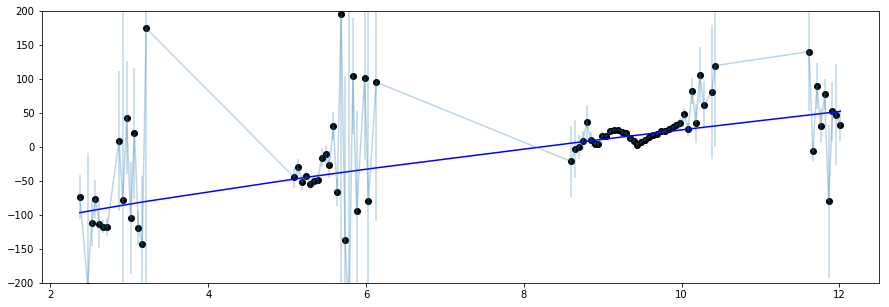

In [32]:
#mass modeling---AnaK1 again

###define model
@custom_model #very necessary line
def eriksmodel(r, alpha=.005, beta=.001, sigma=50, omega=1, v_offset=0):
#     dr = r - r_cen
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)+v_offset


#     return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi + v_offset) #thing wrong ) at end
m_init = eriksmodel(.00001, .00001, 106.66252460508608, 1.0, -14.691345894994585) #rcen=7.990890807087159,
# m_init.r_cen=7.1

###fit model
fit = LevMarLSQFitter()
m = fit(m_init, x, y, weights=(1/(unc)**2))
print(repr(m))

###plot fit
plt.figure(figsize=(15,5))
plt.scatter(x, y, color='k')
plt.errorbar(x,y,yerr=unc,alpha=.3)
plt.plot(x, m(x), color='b')
plt.ylim(-200,200) 

In [33]:
print(fit.fit_info['param_cov'])

None


# tests to see if different in matrix output is due to code or the data....its the data

<eriksmodel(alpha=28.32370603, beta=7.25939384, sigma=-101.29596704, omega=0.00973988, v_offset=0.43451045)>
Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
         alpha              beta       ...        omega              v_offset     
    ---------------- ----------------- ... -------------------- ------------------
    28.3237060347412 7.259393837836722 ... 0.009739879506791373 0.4345104533628037


(-200, 200)

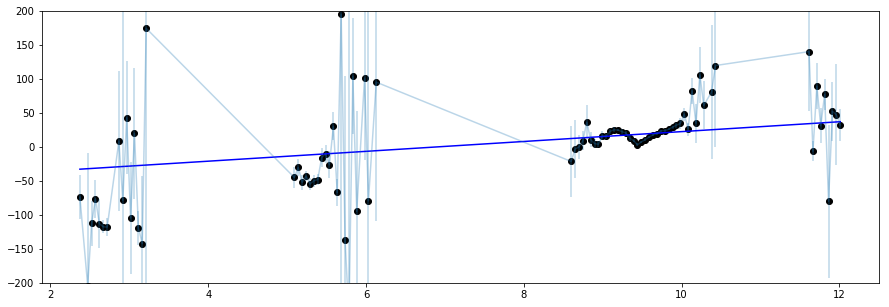

In [34]:
#copied G1 code & used Anak1 data

###define model
@custom_model #very necessary line
def eriksmodel(r, alpha=.00001, beta=.00001, sigma=-120, omega=0.5,v_offset=0):
#     dr=r-r_cen #cant include this at all, not =0,not in eqt, even w/o a forced init of rcen, just cant have
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)+v_offset
#####REMOVED BOUNDS HERE
m_init2 = eriksmodel()#########


###fit model
fit = LevMarLSQFitter()
m2 = fit(m_init2, x, y, weights=(1/(unc)**2))
print(repr(m2))
print(m2)
###plot fit
plt.figure(figsize=(15,5))
plt.scatter(x, y, color='k')
plt.errorbar(x, y, yerr=unc, alpha=.3)
plt.plot(x, m2(x), color='b')
plt.ylim(-200,200) 

In [35]:
fit.fit_info['param_cov'] 

In [37]:
fit.fit_info['param_cov'][2][2]

TypeError: 'NoneType' object is not subscriptable

## exploring diff in data type

In [38]:
# AnaK1
A = [x,y,unc]

#G1
G = [x2,y2,unc2]

In [39]:
for i in range(3):
    print('Anak1:',type(A[i]),len(A[i]),(A[i].dtype),find_range(A[i]),np.min(A[i]))
    print('G1:',type(G[i]),len(G[i]),G[i].dtype,find_range(G[i]),np.min(G[i]))

Anak1: <class 'numpy.ndarray'> 81 float64 9.63954072522728 2.3728100246713306
G1: <class 'numpy.ndarray'> 151 float64 6.085439502928628 -2.4972024887507973
Anak1: <class 'numpy.ndarray'> 81 float64 445.212399973636 -250.06486798399595
G1: <class 'numpy.ndarray'> 151 float64 243.51994624025724 -148.33340290901484
Anak1: <class 'numpy.ndarray'> 81 float64 1174.369492777709 1.5088715586839243
G1: <class 'numpy.ndarray'> 151 float64 884.1653524727453 5.6283295948808085


In [40]:
print('A:',x)
print('G:',x2)

A: [ 2.37281002  2.47167711  2.52111065  2.57054419  2.61997774  2.66941128
  2.71884482  2.86714545  2.91657899  2.96601253  3.01544607  3.06487962
  3.11431316  3.1637467   3.21318024  5.09165484  5.14108839  5.19052193
  5.23995547  5.28938901  5.33882256  5.3882561   5.43768964  5.48712318
  5.53655672  5.58599027  5.63542381  5.68485735  5.73429089  5.78372444
  5.83315798  5.88259152  5.9814586   6.03089215  6.12975923  8.60143634
  8.65086988  8.70030342  8.74973697  8.79917051  8.84860405  8.89803759
  8.94747113  8.99690468  9.04633822  9.09577176  9.1452053   9.19463885
  9.24407239  9.29350593  9.34293947  9.39237301  9.44180656  9.4912401
  9.54067364  9.59010718  9.63954073  9.68897427  9.73840781  9.78784135
  9.83727489  9.88670844  9.93614198  9.98557552 10.03500906 10.0844426
 10.13387615 10.18330969 10.23274323 10.28217677 10.38104386 10.4304774
 11.61688241 11.66631595 11.7157495  11.76518304 11.81461658 11.86405012
 11.91348367 11.96291721 12.01235075]
G: [-2.497202

Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
          alpha               beta       ...       omega             v_offset     
    ------------------ ----------------- ... ----------------- -------------------
    57.014630559571955 56.04968096229678 ... 6.958056365316942 -1.3690186660540788
<eriksmodel(alpha=57.01463056, beta=56.04968096, sigma=-970.22573237, omega=6.95805637, v_offset=-1.36901867)>


(-200, 200)

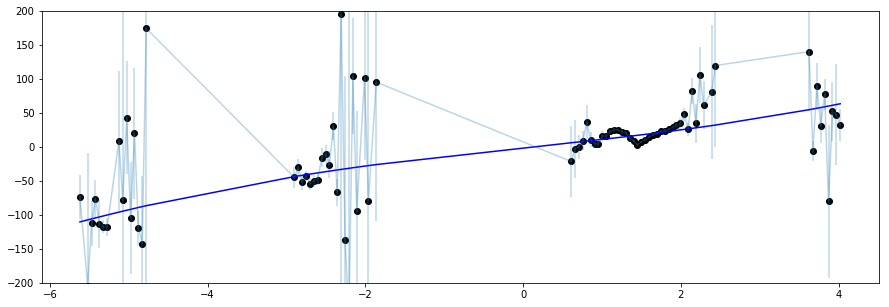

In [41]:
# test ANAk1 again AFTER subtracting core so x looks like x2
best_rcen_anak1 = 7.990890807087159
new_x = x - best_rcen_anak1


#copied G1 code & used Anak1 data

###define model
@custom_model #very necessary line
def eriksmodel(r, alpha=.00001, beta=.00001, sigma=-120, omega=0.5,v_offset=0):
#     dr=r-r_cen #cant include this at all, not =0,not in eqt, even w/o a forced init of rcen, just cant have
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)+v_offset
#####REMOVED BOUNDS HERE
m_init2 = eriksmodel()#########


###fit model
fit = LevMarLSQFitter()
m2 = fit(m_init2, new_x, y, weights=(1/(unc)**2))
print(m2)
print(repr(m2))

###plot fit
plt.figure(figsize=(15,5))
plt.scatter(new_x, y, color='k')
plt.errorbar(new_x, y, yerr=unc, alpha=.3)
plt.plot(new_x, m2(new_x), color='b')
plt.ylim(-200,200) 

In [42]:
print(fit.fit_info['param_cov'] )
print(fit.fit_info['param_cov'] [2][2])

None


TypeError: 'NoneType' object is not subscriptable

## retesting

In [43]:
# AnaK1
A = [new_x,y,unc]

#G1
G = [x2,y2,unc2]

In [44]:
for i in range(3):
    print('Anak1:',type(A[i]),len(A[i]),(A[i].dtype),find_range(A[i]),np.min(A[i]),np.max(A[i]))
    print('G1:',type(G[i]),len(G[i]),G[i].dtype,find_range(G[i]),np.min(G[i]),np.max(G[i]))

Anak1: <class 'numpy.ndarray'> 81 float64 9.639540725227281 -5.618080782415829 4.021459942811451
G1: <class 'numpy.ndarray'> 151 float64 6.085439502928628 -2.4972024887507973 3.588237014177831
Anak1: <class 'numpy.ndarray'> 81 float64 445.212399973636 -250.06486798399595 195.1475319896401
G1: <class 'numpy.ndarray'> 151 float64 243.51994624025724 -148.33340290901484 95.1865433312424
Anak1: <class 'numpy.ndarray'> 81 float64 1174.369492777709 1.5088715586839243 1175.878364336393
G1: <class 'numpy.ndarray'> 151 float64 884.1653524727453 5.6283295948808085 889.7936820676262


In [45]:
new_x,x2

(array([-5.61808078, -5.5192137 , -5.46978016, -5.42034661, -5.37091307,
        -5.32147953, -5.27204599, -5.12374536, -5.07431182, -5.02487828,
        -4.97544473, -4.92601119, -4.87657765, -4.82714411, -4.77771057,
        -2.89923596, -2.84980242, -2.80036888, -2.75093534, -2.70150179,
        -2.65206825, -2.60263471, -2.55320117, -2.50376763, -2.45433408,
        -2.40490054, -2.355467  , -2.30603346, -2.25659991, -2.20716637,
        -2.15773283, -2.10829929, -2.0094322 , -1.95999866, -1.86113158,
         0.61054553,  0.65997907,  0.70941262,  0.75884616,  0.8082797 ,
         0.85771324,  0.90714679,  0.95658033,  1.00601387,  1.05544741,
         1.10488095,  1.1543145 ,  1.20374804,  1.25318158,  1.30261512,
         1.35204867,  1.40148221,  1.45091575,  1.50034929,  1.54978283,
         1.59921638,  1.64864992,  1.69808346,  1.747517  ,  1.79695054,
         1.84638409,  1.89581763,  1.94525117,  1.99468471,  2.04411826,
         2.0935518 ,  2.14298534,  2.19241888,  2.2

In [46]:
#check for nans

for arr in A: #did for A & G, neither had any
    arrlen = np.arange(0,len(arr),1)
    for i in arrlen:
        if np.isnan(arr[i]) == True:
            print(arr[i])

In [47]:
y, y2

(array([-7.39524964e+01, -2.04287060e+02, -1.12684283e+02, -7.63840947e+01,
        -1.12918629e+02, -1.17661292e+02, -1.17963733e+02,  8.71044125e+00,
        -7.85740253e+01,  4.30072356e+01, -1.04581752e+02,  2.00455322e+01,
        -1.18964113e+02, -1.42164037e+02,  1.74524956e+02, -4.50250168e+01,
        -3.00912337e+01, -5.22461486e+01, -4.27194979e+01, -5.46418230e+01,
        -4.98876592e+01, -4.80436945e+01, -1.56479354e+01, -1.02391949e+01,
        -2.62535608e+01,  3.03546019e+01, -6.70661146e+01,  1.95147532e+02,
        -1.36821584e+02, -2.50064868e+02,  1.04135740e+02, -9.48678154e+01,
         1.01195780e+02, -7.92944235e+01,  9.53026163e+01, -2.14324895e+01,
        -3.14468144e+00, -2.12238389e-02,  9.31595365e+00,  3.63882136e+01,
         1.05672066e+01,  4.91161795e+00,  3.93187996e+00,  1.65176805e+01,
         1.58616131e+01,  2.28566154e+01,  2.52356466e+01,  2.47402524e+01,
         2.25196632e+01,  2.05102729e+01,  1.29983351e+01,  9.10369713e+00,
         3.1

In [48]:
unc,unc2

(array([  31.99337379,  195.34924346,   32.75617816,   28.39857282,
          35.72497901,    9.57026409,   13.8609594 ,  102.54147251,
         507.70692357,   82.88114862,   82.26423892,   96.27568112,
          25.03310451,   99.76068748,  595.82821013,   14.74487018,
          12.61185282,   11.34186485,    6.75629838,    8.25897829,
           8.89673428,    8.70369026,   14.48149216,   13.31452627,
          19.5122732 ,   20.85812912,   19.82364002,  636.88215102,
         241.39295134, 1175.87836434,   85.21773223,  148.29913389,
         121.04901607,  566.74313618,  203.81723246,   52.12204947,
          42.60955751,   17.41962048,   14.22772004,   24.82726724,
          11.07258805,    6.12791736,    4.23090586,    7.07280545,
           3.73338639,    3.49555356,    4.00779698,    1.80027212,
           3.11558227,    2.54075365,    4.18044148,    2.26539675,
           2.28250774,    1.99425555,    2.0198672 ,    1.8746437 ,
           1.68977149,    1.70550424,    1.50887

In [49]:
# only other diff comes from output warning: 
## WARNING: The fit may be unsuccessful; check fit_info['message'] for more information. [astropy.modeling.fitting]

